In [13]:
df <- read.csv('/content/sample_data/merged_data.csv')
print(head(df))

      country iso2c iso3c year lastupdated edu_exp_gdp gdp_per_capita
1 Afghanistan    AF   AFG 2007  2025-07-01    4.174895       376.2232
2 Afghanistan    AF   AFG 2007  2025-07-01    4.174895       376.2232
3 Afghanistan    AF   AFG 2007  2025-07-01    4.174895       376.2232
4 Afghanistan    AF   AFG 2007  2025-07-01    4.174895       376.2232
5 Afghanistan    AF   AFG 2007  2025-07-01    4.174895       376.2232
6 Afghanistan    AF   AFG 2007  2025-07-01    4.174895       376.2232
  gov_exp_gdp unemployment_rate inflation_rate population urban_pop_percent
1    16.28296             7.817       8.680571   25909852            23.113
2    16.28296             7.817       8.680571   25909852            23.113
3    16.28296             7.817       8.680571   25909852            23.113
4    16.28296             7.817       8.680571   25909852            23.113
5    16.28296             7.817       8.680571   25909852            23.113
6    16.28296             7.817       8.680571   25909

## Understand the data

Briefly examine the relevant columns in the dataframe (`gdp_per_capita`, `Refugees`, `Returned.Refugees`) to understand their structure and potential issues.


Display the first few rows of the relevant columns, get a summary of these columns, and print their data types to understand their structure and identify potential issues as requested in the instructions.



In [14]:
# Display the first few rows of the relevant columns
print("First few rows of relevant columns:")
print(head(df[, c("gdp_per_capita", "Refugees", "Returned.Refugees")]))

[1] "First few rows of relevant columns:"
  gdp_per_capita Refugees Returned.Refugees
1       376.2232  2833116            278483
2       376.2232  2510294           1957955
3       376.2232  3587327            292484
4       376.2232  6306301            178270
5       376.2232  2666294             61381
6       376.2232  2679132            348343


In [15]:
# Get a summary of the relevant columns
print("\nSummary of relevant columns:")
print(summary(df[, c("gdp_per_capita", "Refugees", "Returned.Refugees")]))

[1] "\nSummary of relevant columns:"
 gdp_per_capita         Refugees       Returned.Refugees
 Min.   :    60.23   Min.   :      0   Min.   :      0  
 1st Qu.:  1365.17   1st Qu.:     50   1st Qu.:      0  
 Median :  4412.84   Median :    657   Median :      0  
 Mean   : 12200.99   Mean   :  46328   Mean   :   3999  
 3rd Qu.: 15185.82   3rd Qu.:  10373   3rd Qu.:      0  
 Max.   :226052.00   Max.   :6403144   Max.   :1957955  


In [16]:
# Print the data types of the relevant columns
print("\nData types of relevant columns:")
print(sapply(df[, c("gdp_per_capita", "Refugees", "Returned.Refugees")], class))

[1] "\nData types of relevant columns:"
   gdp_per_capita          Refugees Returned.Refugees 
        "numeric"         "numeric"         "integer" 


## Data cleaning and preparation

Handle any missing values or inconsistencies in the relevant columns. We might need to aggregate data if it's not already at the country-year level.


Check for missing values in the relevant columns and handle them by removing rows with missing values. Then aggregate the data by country and year.



In [17]:
# Load the dplyr package
library(dplyr)

In [18]:
# Check for missing values
print("Missing values before handling:")
print(colSums(is.na(df[, c("gdp_per_capita", "Refugees", "Returned.Refugees")])))

[1] "Missing values before handling:"
   gdp_per_capita          Refugees Returned.Refugees 
                0                 0                 0 


- Romve it (NA, 50%)
- Fill in new value: Number: mdian/mean:
- Charater: most frequent value: Name/ text

In [19]:
# Handle missing values by removing rows with NA in relevant columns
df_cleaned <- na.omit(df[, c("country", "year", "gdp_per_capita", "Refugees", "Returned.Refugees")])

print("\nMissing values after handling:")
print(colSums(is.na(df_cleaned[, c("gdp_per_capita", "Refugees", "Returned.Refugees")])))


[1] "\nMissing values after handling:"
   gdp_per_capita          Refugees Returned.Refugees 
                0                 0                 0 


In [20]:
# Aggregate the data by country and year using dplyr
df_aggregated <- df_cleaned %>%
  group_by(country, year) %>%
  summarise(
    gdp_per_capita = mean(gdp_per_capita),
    Refugees = sum(Refugees),
    Returned.Refugees = sum(Returned.Refugees)
  ) %>%
  ungroup() # Ungroup the data

# Display the first few rows of the aggregated dataframe
print("\nFirst few rows of aggregated dataframe:")
print(head(df_aggregated))

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


[1] "\nFirst few rows of aggregated dataframe:"
# A tibble: 6 × 5
  country      year gdp_per_capita  Refugees Returned.Refugees
  <chr>       <int>          <dbl>     <dbl>             <int>
1 Afghanistan  2006           274. 107570429          10000108
2 Afghanistan  2007           376. 107570429          10000108
3 Afghanistan  2008           382. 107570429          10000108
4 Afghanistan  2009           452. 107570429          10000108
5 Afghanistan  2010           561. 107570429          10000108
6 Afghanistan  2011           607. 107570429          10000108


In [21]:
# Display a summary of the aggregated dataframe
print("\nSummary of aggregated dataframe:")
print(summary(df_aggregated))

[1] "\nSummary of aggregated dataframe:"
   country               year      gdp_per_capita         Refugees        
 Length:3447        Min.   :1990   Min.   :    60.23   Min.   :        0  
 Class :character   1st Qu.:2002   1st Qu.:  1470.58   1st Qu.:     1423  
 Mode  :character   Median :2010   Median :  4879.44   Median :    26381  
                    Mean   :2009   Mean   : 14711.90   Mean   :  1404084  
                    3rd Qu.:2017   3rd Qu.: 18650.94   3rd Qu.:   440216  
                    Max.   :2023   Max.   :226052.00   Max.   :107570429  
 Returned.Refugees 
 Min.   :       0  
 1st Qu.:       0  
 Median :       8  
 Mean   :  121201  
 3rd Qu.:    3602  
 Max.   :10000108  


## Calculate total displaced persons

Create a new column that combines 'Refugees' and 'Returned.Refugees' to represent the total number of displaced persons.


Create the `total_displaced` column by summing `Refugees` and `Returned.Refugees` in the `df_aggregated` dataframe and display the head and summary of the new column as requested by the instructions.



In [22]:
# Create a new column named total_displaced by summing Refugees and Returned.Refugees
df_aggregated$total_displaced <- df_aggregated$Refugees + df_aggregated$Returned.Refugees

# Print the first few rows of the df_aggregated dataframe including the new column
print("First few rows of df_aggregated with total_displaced:")
print(head(df_aggregated))


[1] "First few rows of df_aggregated with total_displaced:"
# A tibble: 6 × 6
  country      year gdp_per_capita  Refugees Returned.Refugees total_displaced
  <chr>       <int>          <dbl>     <dbl>             <int>           <dbl>
1 Afghanistan  2006           274. 107570429          10000108       117570537
2 Afghanistan  2007           376. 107570429          10000108       117570537
3 Afghanistan  2008           382. 107570429          10000108       117570537
4 Afghanistan  2009           452. 107570429          10000108       117570537
5 Afghanistan  2010           561. 107570429          10000108       117570537
6 Afghanistan  2011           607. 107570429          10000108       117570537


In [23]:
# Print a summary of the total_displaced column
print("\nSummary of total_displaced column:")
print(summary(df_aggregated$total_displaced))

[1] "\nSummary of total_displaced column:"
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        0      1431     26392   1525286    448221 117570537 


## Correlation analysis

Calculate the correlation coefficient between GDP per capita and the total number of displaced persons.


Calculate the correlation coefficient between GDP per capita and the total number of displaced persons.



In [24]:
# Calculate the Pearson correlation coefficient between gdp_per_capita and total_displaced
correlation_gdp_displaced <- cor(df_aggregated$gdp_per_capita, df_aggregated$total_displaced, method = "pearson")

# Print the calculated correlation coefficient
print("Pearson correlation coefficient between GDP per capita and total displaced persons:")
print(correlation_gdp_displaced)

[1] "Pearson correlation coefficient between GDP per capita and total displaced persons:"
[1] -0.1125241


## Data visualization
Create scatter plots to visualize the relationship between GDP per capita and the number of refugees, returned refugees, and total displaced persons.


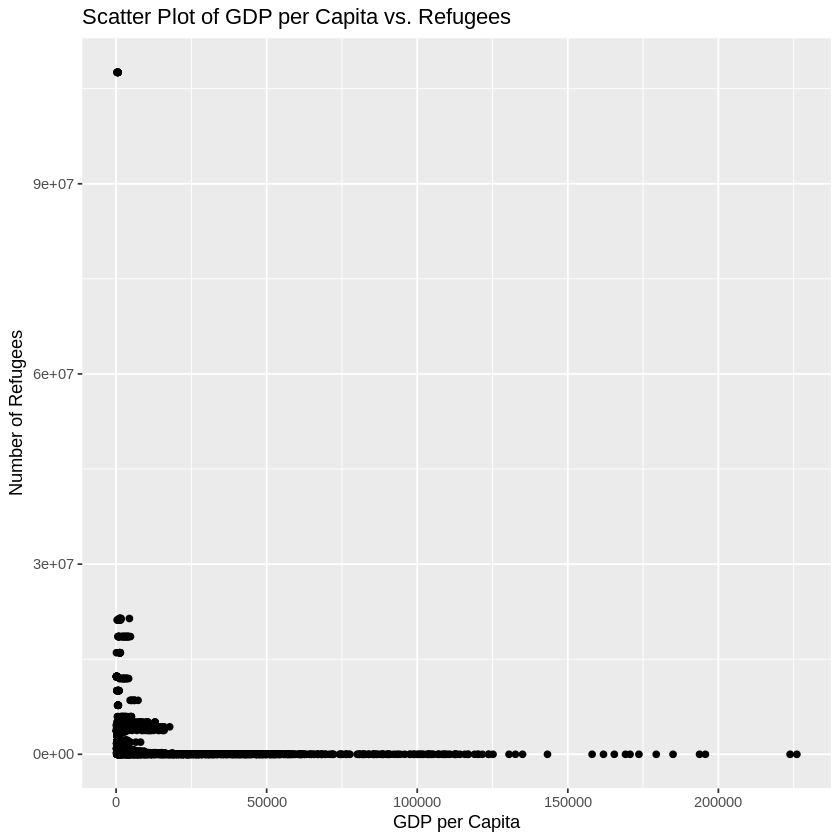

In [25]:
# Load the ggplot2 library for creating visualizations.
library(ggplot2)

# Create a scatter plot visualizing the relationship between GDP per capita and Refugees.
plot_gdp_refugees <- ggplot(df_aggregated, aes(x = gdp_per_capita, y = Refugees)) +
  geom_point() +
  labs(x = "GDP per Capita", y = "Number of Refugees",
       title = "Scatter Plot of GDP per Capita vs. Refugees")

# Print the plot.
print(plot_gdp_refugees)


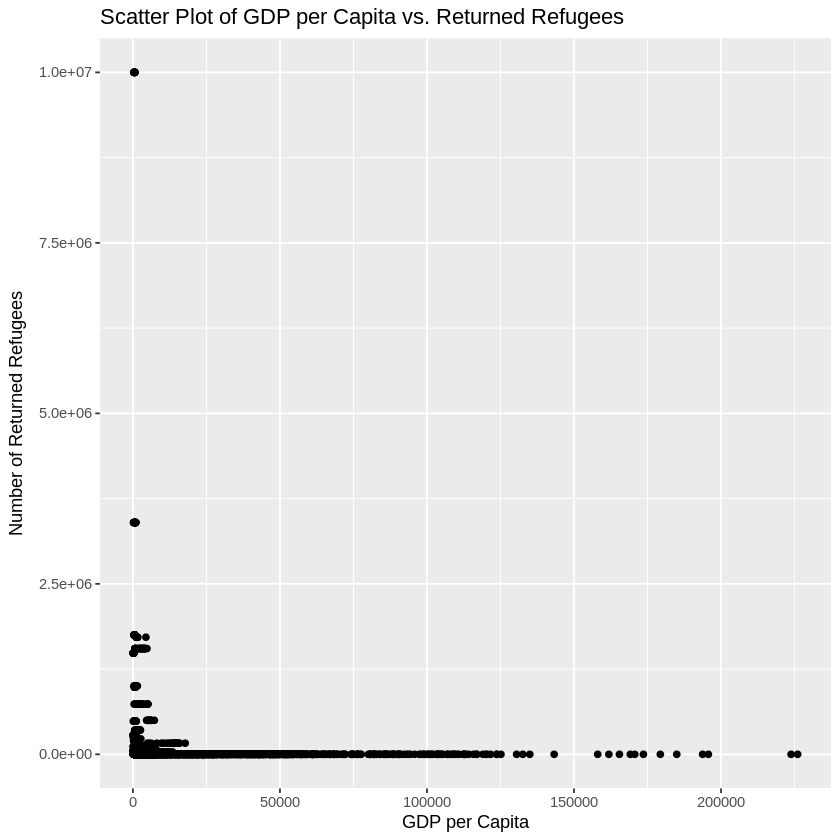

In [26]:
# Create a scatter plot visualizing the relationship between GDP per capita and Returned Refugees.
plot_gdp_returned <- ggplot(df_aggregated, aes(x = gdp_per_capita, y = Returned.Refugees)) +
  geom_point() +
  labs(x = "GDP per Capita", y = "Number of Returned Refugees",
       title = "Scatter Plot of GDP per Capita vs. Returned Refugees")

# Print the plot.
print(plot_gdp_returned)


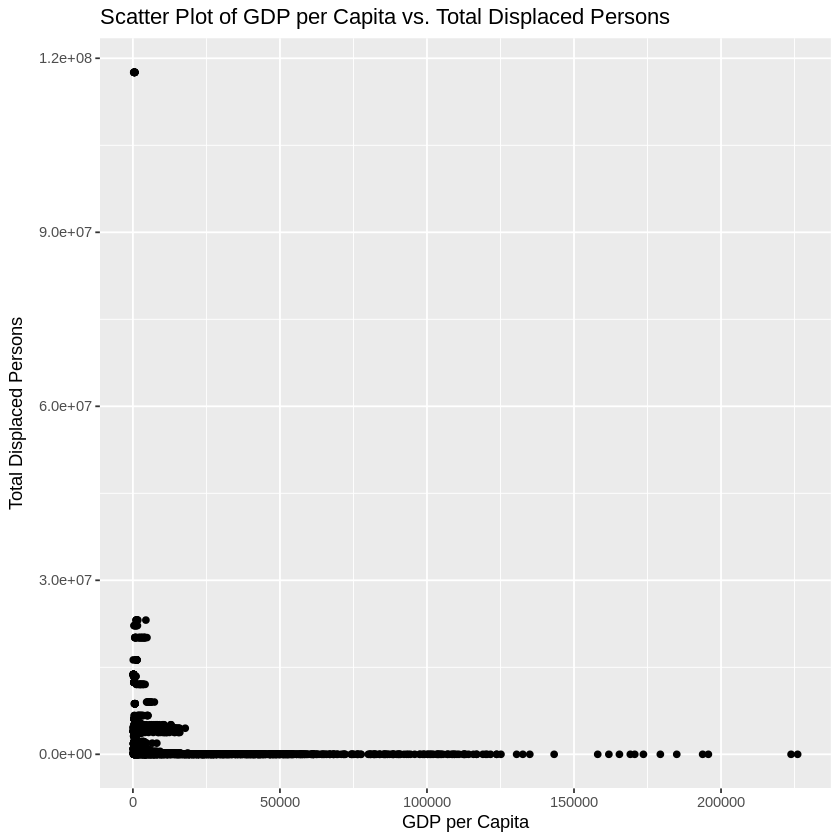

In [27]:
# Create a scatter plot visualizing the relationship between GDP per capita and total displaced persons.
plot_gdp_total_displaced <- ggplot(df_aggregated, aes(x = gdp_per_capita, y = total_displaced)) +
  geom_point() +
  labs(x = "GDP per Capita", y = "Total Displaced Persons",
       title = "Scatter Plot of GDP per Capita vs. Total Displaced Persons")

# Print the plot.
print(plot_gdp_total_displaced)

## Summary:

### Data Analysis Key Findings

*   The initial examination of the data showed that the `gdp_per_capita` and `Refugees` columns are numeric, and `Returned.Refugees` is an integer type. There were no missing values in the relevant columns initially.
*   The data was successfully aggregated by country and year using `dplyr`, calculating the mean `gdp_per_capita` and the sum of `Refugees` and `Returned.Refugees` for each country-year combination.
*   A new column `total_displaced` was created by summing `Refugees` and `Returned.Refugees`, successfully combining the two refugee categories. The summary of this new column showed a wide range of values.
*   The Pearson correlation coefficient between GDP per capita and total displaced persons was calculated as approximately -0.113, indicating a very weak negative linear relationship.
*   Scatter plots were generated to visualize the relationships between GDP per capita and Refugees, Returned Refugees, and total displaced persons, visually supporting the weak correlation finding.

### Insights or Next Steps

*   While a weak negative correlation was found, it's crucial to remember that correlation does not equal causation. Further analysis, potentially including other economic or social factors and time-series analysis, would be needed to understand the complex relationship between economic indicators and displacement.
*   Exploring non-linear relationships or transforming variables (e.g., using logarithmic scales for skewed data like refugee numbers) might reveal different patterns or stronger correlations.
